<a href="https://colab.research.google.com/github/thaisbarras/notebooks_exercicios/blob/main/Atividade_Semana14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade da Semana 14

Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

In [1]:
# Instalando o pacote 'ipeadatapy'
!pip install ipeadatapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# CAPTURA DE DADOS
# (NAO ALTERE ESSE SCRIPT)

# Carregando pacotes
import pandas as pd
import ipeadatapy
import matplotlib.pyplot as plt

# Obtendo serie com dados sobre emplacamento de veículos
emplacamentos = ipeadatapy.timeseries('FENABRAVE12_VENDAUTO12')
emplacamentos.reset_index(inplace=True)
emplacamentos = emplacamentos.loc[(emplacamentos["DATE"] >= "2018-01-01") & (emplacamentos["DATE"] < "2023-01-01"),
                                  "VALUE (Unidade)"]
emplacamentos.rename("emplacamentos", inplace=True)

# Obtendo serie com dados sobre IPI arrecadado sobre automóveis
ipi = ipeadatapy.timeseries('SRF12_IPIVEI12')
ipi.reset_index(inplace=True)
ipi = ipi.loc[(ipi["DATE"] >= "2018-01-01") & (ipi["DATE"] < "2023-01-01"),
                                  "VALUE (R$)"]
ipi.rename("ipi", inplace=True)

carros = pd.concat([emplacamentos.reset_index(drop=True),
                    ipi.reset_index(drop=True)],
                   axis=1)
carros.head()

,emplacamentos,ipi
0,149041.0,396.803197
1,129782.0,294.148084
2,172842.0,316.189768
3,178803.0,460.560847
4,164415.0,388.908702


###Questão 1

Dando continuidade usando os dados da AS12. Vamos relembrar o seguinte:

> O número de veículos emplacados (ou seja, veículos que foram comprados novos) funciona como um indicador econômico que demonstra o poder aquisitivo da população em geral. Estes dados também são úteis como indicadores de saúde, uma vez que, uma frota mais nova, polui menos o ar e o número de casos de doenças respiratórias em grandes centros é reduzido.

> O Imposto sobre Produtos Industrializados, cuja sigla é IPI, é um imposto federal, ou seja, somente a União pode instituí-lo ou modificá-lo, sobre produtos industrializados no Brasil.

É possível utilizar uma regressão linear para estimar o `IPI` utilizando o `número de veículos emplacados`? Argumente utilizando alguma medida estatística para este fim.


In [9]:
# Questao 1
# Existem 3 fatores que ajudam a optar pelo modelo de Regressão Linear.

# 1) Linearidade: A relação entre a variável output (y) e a variável input (x) pode ser representada por uma linha reta no gráfico de dispersão.
  # podemos verificar essa premissa fazendo  cálculo da correlação. Quanto maior a correlação entre as variáveis, mais apropriado é o uso do modelo de Regressão Linear (Para esse primeiro fator)
carros.corr() #0.70685
  # >>> Com uma correlação alta de 0.70685, constatamos que a primeira premissa está satisfeita.

# 2) Independência: As observações são independentes uma das outras.
  # Por exemplo, no nosso DataFrame Carros, na observação de id 30, onde a coluna IPVA indica 134.927 carros emplacados e a coluna IPI um valor de R$ 166.65
  # nada tem a ver com a observação id 32, com 142.019 carros emplacados e um ipi de R$ 250.10
  # uma observação não influencia na outra.
  # >>> Com isso, constatamos que a segunda premissa está satisfeita.


# 3) Output quantitativo contínuo: observa-se a variável y, no nosso caso o IPI, é uma variável quantitativa quantínua.
  # >>> Com isso, constatamos que a terceira premissa está satisfeita.

#  PORTANTO PODEMOS GARANTIR ROBUSTEZ E A VALIDADE E USAR O MODELO DE REGRESSÃO LINEAR


,emplacamentos,ipi
emplacamentos,1.00000,0.70685
ipi,0.70685,1.00000


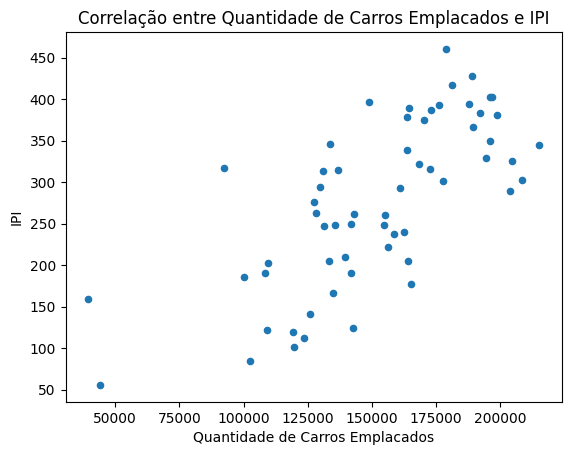

In [10]:
# Questão 1 (Cotinuação)
# Imprimindo gráfico de dispersão para visualizar a correlação vista na Premissa 1
carros.plot.scatter(x='emplacamentos', y='ipi')
plt.title("Correlação entre Quantidade de Carros Emplacados e IPI")
plt.xlabel("Quantidade de Carros Emplacados")
plt.ylabel("IPI")
plt.show()

In [14]:
# Questao 1 (Continuação)

# 2) Independência: As observações são independentes uma das outras.
  # Por exemplo, no nosso DataFrame Carros, na observação de id 30, onde a coluna IPVA indica 134.927 carros emplacados e a coluna IPI um valor de R$ 166.65
  # nada tem a ver com a observação id 32, com 142.019 carros emplacados e um ipi de R$ 250.10
  # uma observação não influencia na outra.
  # >>> Com isso, constatamos que a segunda premissa está satisfeita.


# 3) Output quantitativo contínuo: observa-se a variável y, no nosso caso o IPI, é uma variável quantitativa quantínua.
  # >>> Com isso, constatamos que a terceira premissa está satisfeita.
carros['ipi'].describe()


count     60.000000
mean     276.018551
std       99.329753
min       55.799690
25%      204.620787
50%      291.252952
75%      353.526300
max      460.560847
Name: ipi, dtype: float64

<Axes: ylabel='Frequency'>

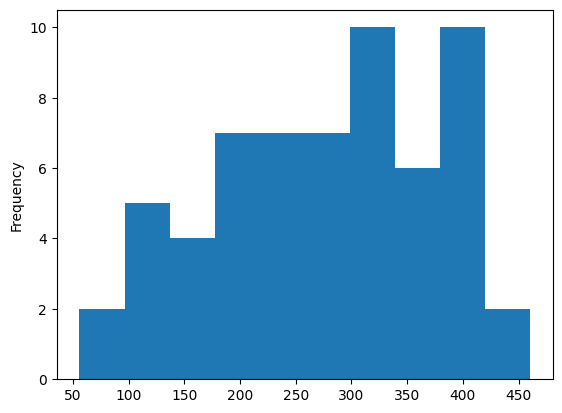

In [15]:
# Questao 1 (Continuação)

# Imprimindo gráfico de histograma para visualizar a variável contínua vista na Premissa 3

carros['ipi'].plot.hist()


########### PORTANTO PODEMOS GARANTIR ROBUSTEZ E A VALIDADE E USAR O MODELO DE REGRESSÃO LINEAR ##########

**RESPOSTA: COMO TODAS AS TRÊS PREMISSAS FORAM SATISFEITAS, PODEMOS GARANTIR ROBUSTEZ E A VALIDADE AO UTILIZAR O MODELO E REGRESSÃO LINEAR**

###Questão 2

Crie uma base de `treinamento` e de `teste` para o ajuste de um modelo linear. Utilize 70% dos dados como conjunto de treinamento.


In [16]:
# Questao 2
from sklearn.model_selection import train_test_split

# definindo porcentagem de treino e teste
treino, teste = train_test_split(carros, train_size=0.70, test_size=0.30)

# verificando o tamanho do treino e o tamanho do teste
print(treino.shape)
print(teste.shape)



(42, 2)
(18, 2)


###Questão 3

Treine o modelo linear utilizando a base de `treino`.

In [26]:
# Questao 3
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X_treino = sm.add_constant(treino['emplacamentos'])
y_treino = treino['ipi']

reg = LinearRegression()

modelo_estimado = reg.fit(X = X_treino, y = y_treino)

###Questão 4

Avalie a `performance` do modelo estimado através do **coeficiente de determinação** $R^2$.
*    Qual percentual de variabilidade do `IPI` é explicado pelo `número de emplacamentos`?
*    O que esse valor calculado representa?


In [27]:
# Questao 4
# A PERFORMANCE diz o quanto o modelo está adequado aos dados
# Em Regressão Linear utilizamos a coeficiente de determinação (R2) para medir a variância dos outputs (0 a 1)
modelo_estimado.score(X = X_treino, y = y_treino)

# Com o coeficiente de determinação (R2) de 0.479,
# O modelo linear explica 48% da variância do IPI (output) a partir do numero de emplacamentos
# Esse valor indica que o modelo proposto é bom em ajustar os dados


0.4799645766906412

In [28]:
# Questao 4 (continuação)
# Interpretando os dados fazendo os coeficientes da reta
# y = a + bx + e

a = modelo_estimado.intercept_
b = modelo_estimado.coef_[1]

print(a)
print(b)


-7.837995176811091
0.0018989078368177542


In [ ]:
# Questao 4 (continuação)
# Interpretando os dados fazendo os coeficientes da reta
# y = a + bx + e

# Este modelo indica que lugares com n carros emplacados tem ipi de (-7,83 + n*0,0019)
# Exemplo: Um lugar com nenhum carro emplacado teria um IPI de -7,
# Ao interpretar esse valor pode-se concluir que o erro pode ajudar a explicar mais o modelo,
# visto que outros fatores para influenciar no ipi


###Questão 5

Faça a previsão para o conjunto de teste.
*    Calcule o $R^2$ para estes resultados
*    Faça o gráfico que exibe os dados observados e a reta estimada pelo modelo linear

In [29]:
# Questao 5

X_teste = sm.add_constant(teste['emplacamentos'])
y_teste = teste['ipi']

previsao = modelo_estimado.predict(X = X_teste)
print(previsao)



[320.37303315 288.6422832  241.35568025 361.73884147 234.14172938
 167.24890301 364.16754459  75.96650439 226.81574294 303.88671532
 261.8429969  219.64736586 231.32564905 364.02132869 302.62773942
 329.31309125 298.02098901 315.83084561]


In [30]:
# Questao 5 (continuação)

modelo_estimado.score(X=X_teste, y = y_teste)

# Para os testes o coeficiente de determinação (R2) foi de 0,51.
# Isso significa que 51% de variabilidade do IPI é explicado pelo número de emplacamentos nos testes
# Esse valor confirma que o modelo proposto é bom em ajustar os dados

0.5125755517614118

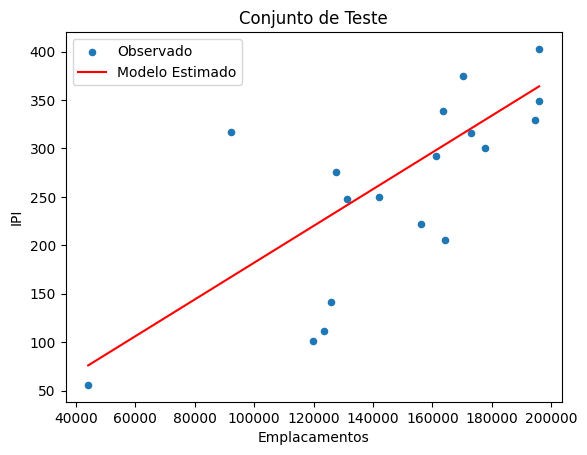

In [32]:
# Questao 5 (continuação)
import numpy as np

teste.plot.scatter(x='emplacamentos', y='ipi', label='Observado')

x_prev = np.linspace(teste['emplacamentos'].min(), teste['emplacamentos'].max(), 100).reshape(-1, 1)
y_prev = a + b * x_prev

plt.plot(x_prev, y_prev, color='red', label='Modelo Estimado')

plt.xlabel("Emplacamentos")
plt.ylabel("IPI")
plt.title("Conjunto de Teste")

plt.legend()

plt.show()

